# here are the 

### AzureFunctionsInvocationTrace2021 - This is a trace of function invocations for two weeks starting on 2021-01-31. The trace contains invocation arrival and departure (or compeletion) times, with the following schema:

- app: application id (encrypted)
- func: function id (encrypted), and unique only within an application
- end_timestamp: function invocation end timestamp in millisecond
- duration: duration of function invocation in millisecond

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None


In [81]:
trace = pd.read_csv('Trace2021/AzureFunctionsInvocationTraceForTwoWeeksJan2021.txt')
#added new column called "start_timestamp" by using "end_timestmap" - "duration"
trace["start_timestamp"] = trace["end_timestamp"] - trace["duration"]
trace = trace[['app','func','start_timestamp','end_timestamp','duration']]
trace = trace.rename(columns = {'app': 'app_id', 'func': 'func_id'}, inplace = False)
trace.sort_values(by=['start_timestamp'], ascending=False)
trace.head()

,app_id,func_id,start_timestamp,end_timestamp,duration
0,7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de...,e3cdb48830f66eb8689cc0223514569a69812b77e6611e...,0.001491,0.079491,0.078
1,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,337cd24a7d5fd5c92460faee4ebe6a186a0eb322bd17b7...,0.003860,57.157860,57.154
2,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,48cc770d590d3c5a7691b3b4e9302f82ec3be5ddc2a037...,0.005478,59.130478,59.125
3,f274d71de386ccc77e4ca74766dbc485461c3053059d47...,3d2aee54a133509f16fb636d74128c2adcfcac71c6dcef...,0.016541,6.252541,6.236
4,7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de...,68bbfd828223a505d7917339f4656c5f33ff93225cdb9d...,0.016824,0.066824,0.050


# Graph 1 (application count and ranking)

In [3]:
applicationCounts = trace['app_id'].value_counts().rename_axis('unique_application_id').reset_index(name='counts')
applicationCounts.head(10)

,unique_application_id,counts
0,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,535667
1,a9644719e5d173a27e098cffdd5e9227ba9c4a325d082c...,328885
2,96149d3ed4f00afb92f12856101e693e93c4683f030ae6...,299817
3,7958f89676bf3653f72cda8f38f6b3c0574dcae5169824...,143521
4,62ed48c098820db02aa8e99ad41e5438e61334ba7b1618...,124927
5,70b9cea7ca266637479483f517194c402dfe99b5fc2357...,71837
6,5fb02cfeb979fec16df02d1ece227157238477b19fc6e3...,59798
7,73e9cf25a1a3b312f60ead2177d7d259f128661e3b6763...,34713
8,6e42a4e8ea1df408e059ba37d0e04255fd8385235b3102...,31260
9,734272c01926d19690e5ec308bab64ef97950b75b1c758...,31100


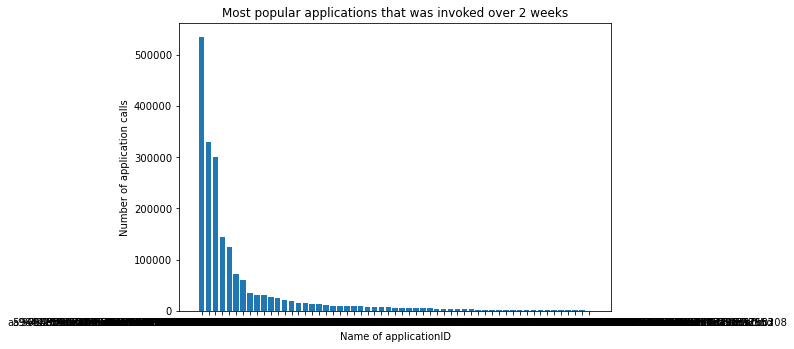

In [6]:
import matplotlib.pyplot as plt
filteredCounts = applicationCounts.loc[applicationCounts['counts'] > 500]
x = filteredCounts['unique_application_id']
y = filteredCounts['counts']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
#ax.legend(labels=['Men', 'Women'])
ax.set_ylabel('Number of application calls')
ax.set_xlabel('Name of applicationID')
ax.set_title('Most popular applications that was invoked over 2 weeks')

plt.show()

# Graph 2: Number of functions per application

In [43]:
function_per_application_count = trace.groupby('app_id')['func_id'].nunique().rename_axis('app_id').reset_index(name='func_counts').sort_values(['func_counts'], ascending=[False])
function_per_application_count.reset_index(drop=True, inplace=True)
function_per_application_count

,app_id,func_counts
0,a9fd6223e00378edd60a03c721f9345f34d198757a4057...,29
1,3efeb602c2eb29e2729b18ad18da8936f44c862a205fd9...,23
2,96149d3ed4f00afb92f12856101e693e93c4683f030ae6...,16
3,a0ed6d33dc4622e0a557f45a85a64d359ca20c3e5888fe...,15
4,b81ed828cb5e719288b0c64b3e27bcd36d78d32c4e4565...,15
...,...,...
114,7fa05b607ae861b85ec53cea12d3efaed8be0f9a92f5d6...,1
115,71fab9125e9dc96cc1e0464ce3775789681facaee3b5b8...,1
116,68d84244f6a3c212c69884d292b01a04ade8573f6c7b74...,1
117,682c50b946b6efb68d6610e43b5caff289e8aa39b3aa5d...,1


55 out of 119 applications has only 1 function, 46.21848739495798 %


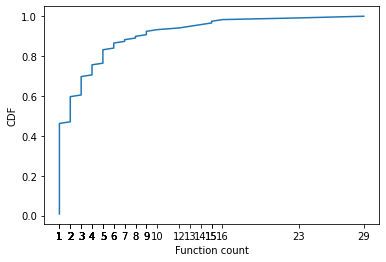

In [21]:
x = np.sort(function_per_application_count['func_counts'])
y = np.arange(1, len(x)+1) / len(x)
function_per_application_CDF = plt.plot(x,y)
function_per_application_CDF = plt.xticks(x, fontsize=10)
function_per_application_CDF = plt.xlabel('Function count')
function_per_application_CDF = plt.ylabel('CDF')

a = function_per_application_count.loc[function_per_application_count['func_counts'] <=1]
print("{} out of {} applications has only 1 function, {} %".format(len(a), len(function_per_application_count), len(a)/len(function_per_application_count)*100))

# Improved version of Graph 2

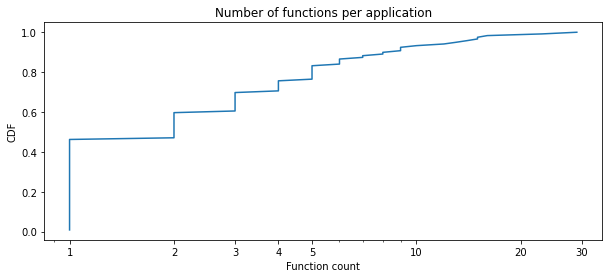

In [13]:
x = np.sort(function_per_application_count['func_counts'])
y = np.arange(1, len(x)+1) / len(x)
# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Set the x-axis to a logarithmic scale
ax.set_xscale('log')

# Set the tick locations and labels for the x-axis
ax.set_xticks([1,2,3,4,5,10,20, 30])
ax.set_xticklabels(['1','2','3','4','5','10','20','30'])
ax.set_title('Number of functions per application')
fig.set_figwidth(10)
# Display the plot
plt.xlabel('Function count')
plt.ylabel('CDF')
plt.show()

# Graph 3: invocation duration of functions

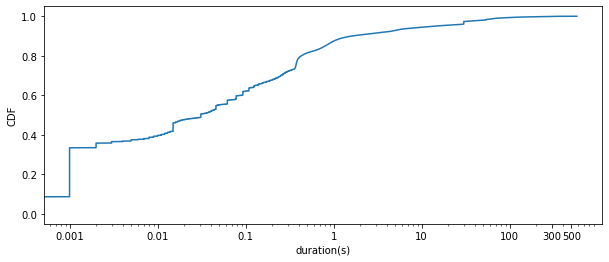

1230391 out of 1980951 total functions has execution time of less than 0.1s, 62.111127433237876 %


In [20]:
x = np.sort(trace['duration'])
y = np.arange(1, len(x)+1) / len(x)

# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Set the x-axis to a logarithmic scale
ax.set_xscale('log')

# Set the tick locations and labels for the x-axis
ax.set_xticks([0.001,0.01,0.1,1, 10, 100,300,500])
ax.set_xticklabels(['0.001','0.01','0.1','1','10', '100','300','500'])
fig.set_figwidth(10)
# Display the plot
plt.xlabel('duration(s)')
plt.ylabel('CDF')
plt.show()

a = trace.loc[trace['duration'] <=0.1]
print("{} out of {} total functions has execution time of less than 0.1s, {} %".format(len(a), len(trace), len(a)/len(trace)*100))

# invocation duration of applications

In [42]:
duration_per_application = trace.groupby(['app_id'])['duration'].sum().rename_axis('app_id').reset_index(name='duration').sort_values(['duration'], ascending=[False])
duration_per_application.reset_index(drop=True, inplace=True)
duration_per_application


,app_id,duration
0,85effaac4d59e8d2b8cce94be2794ccae809b5ee047010...,1299852.707
1,a4a3c0390fad6c1ab8f2dc77113af81781edc24961772a...,1039683.413
2,734272c01926d19690e5ec308bab64ef97950b75b1c758...,964339.937
3,85479ef37b5dc75dd5aeca3bab499129b97a134dac5d74...,641037.551
4,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,581711.665
...,...,...
114,64f056310269572d34dcf626607cc098da009963bd4526...,0.946
115,71fab9125e9dc96cc1e0464ce3775789681facaee3b5b8...,0.892
116,57d15fc6e7154e6c733abfbb4467d0e89bd95f67b4e77e...,0.561
117,1c5682a8e57d04d0399b33a181f549eae87392cb3b013b...,0.265


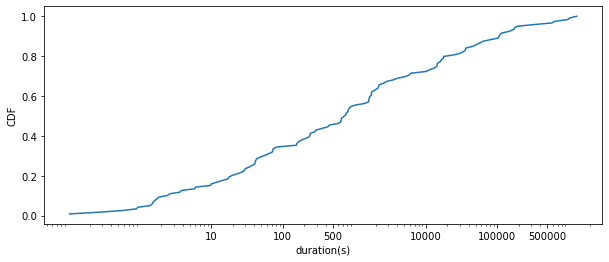

86 out of 119 applications has total execution time of less than 10,000s, 72.26890756302521 %


In [48]:
x = np.sort(duration_per_application['duration'])
y = np.arange(1, len(x)+1) / len(x)
# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Set the x-axis to a logarithmic scale
ax.set_xscale('log')

# Set the tick locations and labels for the x-axis
ax.set_xticks([10, 100,500,10000,100000,500000])
ax.set_xticklabels(['10', '100','500','10000','100000','500000'])
fig.set_figwidth(10)
# Display the plot
plt.xlabel('duration(s)')
plt.ylabel('CDF')
plt.show()

a = duration_per_application.loc[duration_per_application['duration'] <=10000]
print("{} out of {} applications has total execution time of less than 10,000s, {} %".format(len(a), len(duration_per_application), len(a)/len(duration_per_application)*100))

# We can compare the top applications with the most number of functions vs the top application with the longest execution duration

In [75]:
duration_per_application.head(10)

,app_id,duration
0,85effaac4d59e8d2b8cce94be2794ccae809b5ee047010...,1299852.707
1,a4a3c0390fad6c1ab8f2dc77113af81781edc24961772a...,1039683.413
2,734272c01926d19690e5ec308bab64ef97950b75b1c758...,964339.937
3,85479ef37b5dc75dd5aeca3bab499129b97a134dac5d74...,641037.551
4,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,581711.665
5,6e42a4e8ea1df408e059ba37d0e04255fd8385235b3102...,321577.584
6,7fa05b607ae861b85ec53cea12d3efaed8be0f9a92f5d6...,188252.585
7,70b9cea7ca266637479483f517194c402dfe99b5fc2357...,175441.887
8,046b5f12d0ed300f37f207b6fb77b87e23fad3a7480d76...,168829.442
9,d27353c8ad7c924a609457eb5a53333a7e519bcf8efd88...,147942.518


In [76]:
function_per_application_count.head(10)

,app_id,func_counts
0,a9fd6223e00378edd60a03c721f9345f34d198757a4057...,29
1,3efeb602c2eb29e2729b18ad18da8936f44c862a205fd9...,23
2,96149d3ed4f00afb92f12856101e693e93c4683f030ae6...,16
3,a0ed6d33dc4622e0a557f45a85a64d359ca20c3e5888fe...,15
4,b81ed828cb5e719288b0c64b3e27bcd36d78d32c4e4565...,15
5,a03d8277f9ec95f7202dbb6fbce63466b552f028c9aedf...,14
6,dfcd50e431bff00cbb9b2fb9e3e6f312fab091b64488a4...,13
7,7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de...,12
8,734272c01926d19690e5ec308bab64ef97950b75b1c758...,10
9,b1034a4b389601e02fcf2318a83a64cc779bf47aa1100a...,9


# Here, we can see that the top 10 application with the most number of functions against their total execution time

In [78]:
top_function_counts = ['a9fd6223e00378edd60a03c721f9345f34d198757a4057','3efeb602c2eb29e2729b18ad18da8936f44c862a205fd9','96149d3ed4f00afb92f12856101e693e93c4683f030ae6','a0ed6d33dc4622e0a557f45a85a64d359ca20c3e5888fe','b81ed828cb5e719288b0c64b3e27bcd36d78d32c4e4565','a03d8277f9ec95f7202dbb6fbce63466b552f028c9aedf','dfcd50e431bff00cbb9b2fb9e3e6f312fab091b64488a4','7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de','734272c01926d19690e5ec308bab64ef97950b75b1c758','b1034a4b389601e02fcf2318a83a64cc779bf47aa1100a']
duration_per_application[duration_per_application['app_id'].str.contains('|'.join(top_function_counts))]

,app_id,duration
2,734272c01926d19690e5ec308bab64ef97950b75b1c758...,964339.937
11,96149d3ed4f00afb92f12856101e693e93c4683f030ae6...,108430.759
28,b1034a4b389601e02fcf2318a83a64cc779bf47aa1100a...,14632.899
46,a0ed6d33dc4622e0a557f45a85a64d359ca20c3e5888fe...,1732.036
50,a03d8277f9ec95f7202dbb6fbce63466b552f028c9aedf...,1595.392
51,a9fd6223e00378edd60a03c721f9345f34d198757a4057...,1594.054
52,7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de...,1418.387
72,b81ed828cb5e719288b0c64b3e27bcd36d78d32c4e4565...,233.435
80,3efeb602c2eb29e2729b18ad18da8936f44c862a205fd9...,72.208
89,dfcd50e431bff00cbb9b2fb9e3e6f312fab091b64488a4...,37.604


# Here, we can see that the top 10 application with the longest execution time have majority only single digit function counts

In [77]:
top_application_time = ['85effaac4d59e8d2b8cce94be2794ccae809b5ee047010','a4a3c0390fad6c1ab8f2dc77113af81781edc24961772a','96149d3ed4f00afb92f12856101e693e93c4683f030ae6','85479ef37b5dc75dd5aeca3bab499129b97a134dac5d74','1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003','6e42a4e8ea1df408e059ba37d0e04255fd8385235b3102','7fa05b607ae861b85ec53cea12d3efaed8be0f9a92f5d6','70b9cea7ca266637479483f517194c402dfe99b5fc2357','046b5f12d0ed300f37f207b6fb77b87e23fad3a7480d76','d27353c8ad7c924a609457eb5a53333a7e519bcf8efd88']
function_per_application_count[function_per_application_count['app_id'].str.contains('|'.join(top_application_time))]

,app_id,func_counts
2,96149d3ed4f00afb92f12856101e693e93c4683f030ae6...,16
10,85479ef37b5dc75dd5aeca3bab499129b97a134dac5d74...,9
14,85effaac4d59e8d2b8cce94be2794ccae809b5ee047010...,7
19,a4a3c0390fad6c1ab8f2dc77113af81781edc24961772a...,6
20,046b5f12d0ed300f37f207b6fb77b87e23fad3a7480d76...,5
21,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,5
39,70b9cea7ca266637479483f517194c402dfe99b5fc2357...,3
52,6e42a4e8ea1df408e059ba37d0e04255fd8385235b3102...,2
73,d27353c8ad7c924a609457eb5a53333a7e519bcf8efd88...,1
114,7fa05b607ae861b85ec53cea12d3efaed8be0f9a92f5d6...,1


# Graph 4: interval duration between each subsequent function invocations

In [82]:
def functionInterval(list_end_timestamp,list_start_timestamp):
    listInterval=[]
    #assume first function invocation has no delay
    listInterval.append(0)
    for i in range(len(list_start_timestamp)-1):
    #for i in range(5-1):
        #print("start(i+1): {} start(i): {} difference: {}".format(list_start_timestamp[i+1],list_start_timestamp[i],list_start_timestamp[i+1]-list_start_timestamp[i]))
        listInterval.append(list_start_timestamp[i+1]-list_start_timestamp[i])
    return listInterval

#sort by the order that the functions are being executed
final_df = trace.sort_values(by=['start_timestamp'], ascending=True)
list_start_timestamp = final_df['start_timestamp'].tolist()
list_end_timestamp = final_df['end_timestamp'].tolist()

a = functionInterval(list_end_timestamp,list_start_timestamp)
# mutate the column interval onto the dataset
trace['interval'] = a
trace

,app_id,func_id,start_timestamp,end_timestamp,duration,interval
0,7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de...,e3cdb48830f66eb8689cc0223514569a69812b77e6611e...,1.490900e-03,7.949090e-02,0.078,0.000000
1,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,337cd24a7d5fd5c92460faee4ebe6a186a0eb322bd17b7...,3.860041e-03,5.715786e+01,57.154,0.002369
2,1573b95c039e51cc012b543a4af3bc7c3ee9485acbb003...,48cc770d590d3c5a7691b3b4e9302f82ec3be5ddc2a037...,5.477905e-03,5.913048e+01,59.125,0.001618
3,f274d71de386ccc77e4ca74766dbc485461c3053059d47...,3d2aee54a133509f16fb636d74128c2adcfcac71c6dcef...,1.654107e-02,6.252541e+00,6.236,0.011063
4,7b2c43a2bc30f6bb438074df88b603d2cb982d3e7961de...,68bbfd828223a505d7917339f4656c5f33ff93225cdb9d...,1.682396e-02,6.682396e-02,0.050,0.000283
...,...,...,...,...,...,...
1980946,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209597e+06,1.209597e+06,0.001,0.370307
1980947,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209598e+06,1.209598e+06,0.001,1.490392
1980948,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209599e+06,1.209599e+06,0.001,0.370110
1980949,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209599e+06,1.209599e+06,0.001,0.066863


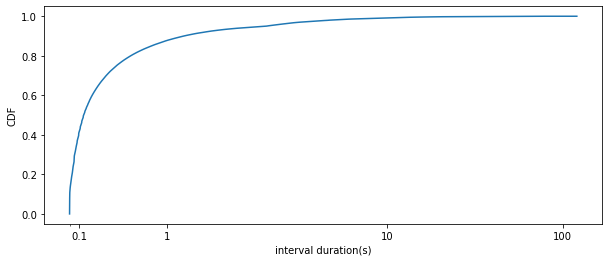

1738457 out of 1980951 incoming functions has interval time of less than 1s, 87.75870781256073 %


In [84]:
x = np.sort(trace['interval'])
y = np.arange(1, len(x)+1) / len(x)

# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Set the x-axis to a logarithmic scale
ax.set_xscale('symlog')

# Set the tick locations and labels for the x-axis
ax.set_xticks([0.1,1, 10, 100])
ax.set_xticklabels(['0.1','1','10', '100'])
fig.set_figwidth(10)
# Display the plot
plt.xlabel('interval duration(s)')
plt.ylabel('CDF')
plt.show()

a = trace.loc[trace['interval'] <=1]
print("{} out of {} incoming functions has interval time of less than 1s, {} %".format(len(a), len(trace), len(a)/len(trace)*100))

# todo
- group applications invocation by days (binning in multiple of 216,000 seconds = 1day) - line chart

- create 1 more column "average invocation per day" = $$ \frac{sum(count(Invocationsperapplication))}{no.days}$$